# Diamond Price Predictor lab

## Project Details
### Problem Statement
A diamond distributor has recently decided to exit the market and has put up a set of 3,000 diamonds up for auction. Seeing this as a great opportunity to expand its inventory, a jewelry company has shown interest in making a bid. To decide how much to bid, you will use a large database of diamond prices to build a model to predict the price of a diamond based on its attributes. Then you will use the results of that model to make a recommendation for how much the company should bid.

The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of the that price, so your recommended bid price should represent that.

# Data Understanding

There are two datasets, diamonds.csv contains the data used to build the regression model. new_diamonds_new.csv contains the data for the diamonds the company would like to purchase. Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices. You'll be predicting prices for the new_diamonds.csv dataset.

+ Carat represents the weight of the diamond, and is a numerical variable.
+ Cut represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. In project zero, these categories were represented by an ordinal variable, 1-5. You can decide to use the ordinal or categorical variable.
+ Clarity represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (in order from least to most pure). In project zero, these categories were represented by an ordinal variable, 1-8. You can decide to use the ordinal or categorical variable.
+ Color represents the color of the diamond, and is rated D through J, with D being the most colorless (and valuable) and J being the most yellow.

In [1]:
# Import the libraries to be used in the model
import pandas as pd
import numpy as np
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

`%matplotlib inline` Enables you to plot in jupyter notebooks

In [2]:
# Load the csv files to be used ass train and test data
train_df = pd.read_csv("diamonds.csv")
test_df = pd.read_csv("new-diamonds.csv")
train_df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [3]:
# Inspect the data in the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
Unnamed: 0     50000 non-null int64
carat          50000 non-null float64
cut            50000 non-null object
cut_ord        50000 non-null int64
color          50000 non-null object
clarity        50000 non-null object
clarity_ord    50000 non-null int64
price          50000 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


Drop columns that will not be used in the model. First rename the unnamed column

In [4]:
train_df.rename(columns={'Unnamed: 0':'Mark'}, inplace=True)
train_df.drop(columns = ['Mark'], inplace = True) # => train_df = train_df.drop(columns =["Mark"]) == train_df.drop("columns_names",axis = 1, inplace = True)
train_df.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,0.51,Premium,4,F,VS1,4,1749
1,2.25,Fair,1,G,I1,1,7069
2,0.70,Very Good,3,E,VS2,5,2757
3,0.47,Good,2,F,VS1,4,1243
4,0.30,Ideal,5,G,VVS1,7,789


Check the data types and convert the features to appropriate types

In [5]:
train_df["price"]=train_df["price"].astype("float")
train_df.dtypes

carat          float64
cut             object
cut_ord          int64
color           object
clarity         object
clarity_ord      int64
price          float64
dtype: object

Check for missing values in the dataframe if any

In [6]:
train_df.isnull().any().any()

False

`train_df.isnull().sum()`: Check for frequency of missing values

`train_df["price"].isnull().value_counts()` : Checks for the number of missing values in the price column

In [7]:
#To get total number of missing values
train_df.isnull().sum().sum()

0

Here I am checking to see whether I should normalize values in the Price and Carat features

In [8]:
print("Maximum price:{} \tMinimum Price:{}".format(train_df["price"].max(),train_df["price"].min()))
print("Maximum Weight:{} \tMinimum Weight:{}".format(train_df["carat"].max(),train_df["carat"].min()))

Maximum price:18823.0 	Minimum Price:326.0
Maximum Weight:5.01 	Minimum Weight:0.2


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question :</h1>

<b>Should I normalize the features in this dataset?</b>
    
<b>How do I know when to normalize? Kindly use this dataset to explain</b>
</div>

# Check feature correlation as below 

In [9]:
# Checks correlation between the specified features
train_df[["carat","cut_ord","clarity_ord","price"]].corr()

,carat,cut_ord,clarity_ord,price
carat,1.000000,-0.135679,-0.343725,0.921777
cut_ord,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,-0.343725,0.189461,1.000000,-0.142159
price,0.921777,-0.053804,-0.142159,1.000000


In [10]:
#Checks correlation for the whole dataframe. That means only features with numerical values
train_df.corr()

,carat,cut_ord,clarity_ord,price
carat,1.000000,-0.135679,-0.343725,0.921777
cut_ord,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,-0.343725,0.189461,1.000000,-0.142159
price,0.921777,-0.053804,-0.142159,1.000000


# Correlation visualization using seaborn

Here we will be visualizing the relationship between the features with numerical values and the target variable to get more insight into the dataset

# Continuous numerical variables

1. Relationship between Carat and Price

(0, 40800.4592543131)

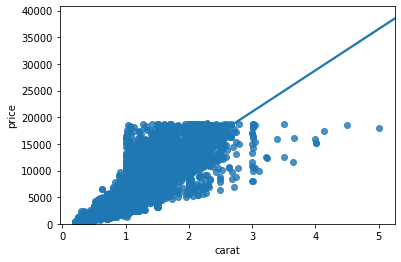

In [11]:
sns.regplot(x="carat",y="price",data=train_df)
plt.ylim(0,)

2. Relationship between cut_ord and Price

(0, 19754.426041990893)

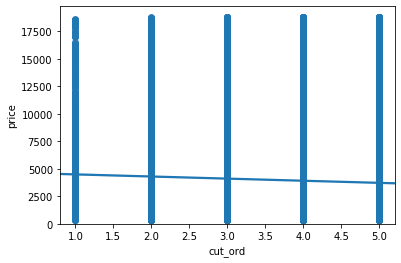

In [12]:
sns.regplot(x="cut_ord",y="price",data=train_df)
plt.ylim(0,)

3. Relationship between clarity_ord and Price

(0, 19754.426041990893)

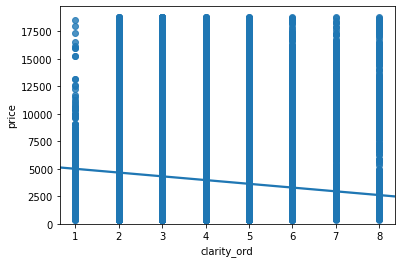

In [13]:
sns.regplot(x="clarity_ord",y="price",data=train_df)
plt.ylim(0,)

From the scatterplots we can make the below deductions:
* There's a strong positive correlation between the weight and price of the diamonds.
* The correlation between cut and clarity with respect to price is weak and these features may not be useful in creating the model. Reason being these features are categorical variables, which are best visualized using boxplots

# Categorical Variables
I am going to use boxplots to visualize categorical variables

1. Visualize the relationship between cut and price

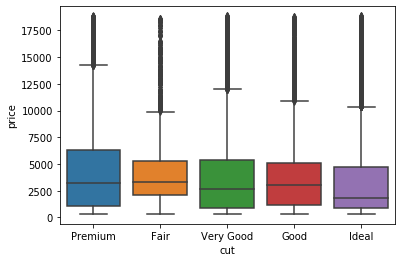

In [14]:
sns.boxplot(x="cut",y="price",data=train_df)

From the boxplot we can see we have several outliers in each category in the cut feature when it comes to pricing. Here we see that the distribution of price between the different cut categories differs; as such cut could potentially be a predictor of price.

2. Visualize the relationship between clarity and price

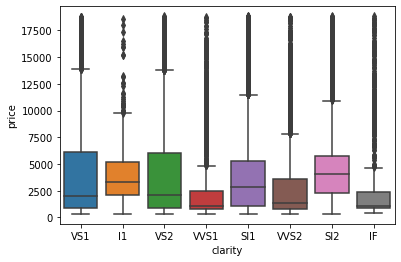

In [15]:
sns.boxplot(x="clarity",y="price",data = train_df)

From the boxplot we can see we have several outliers in each category in the clarity feature when it comes to pricing. Here we see that the distribution of price between the different clarity categories differs; as such clarity could potentially be a predictor of price

# Descriptive Analytics

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics

In [16]:
train_df.describe()

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


In [17]:
train_df.describe(include=["object"])

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,19977,10448,12097


# Value Counts
This is a good way of understanding how many units of each variable we have.

In [18]:
# Create a variable that will hold the counts of categories in the cut feature and convert the data series to a dataframe
cut_counts=train_df["cut"].value_counts().to_frame()
cut_counts.rename(columns={"cut":"value_counts"},inplace=True) #Rename the column of the dataframe
cut_counts.index.name = "cut" # Rename the index of the dataframe
cut_counts

,value_counts
cut,
Ideal,19977
Premium,12792
Very Good,11184
Good,4547
Fair,1500


In [19]:
# Create a variable that will hold the counts of categories in the color feature and convert the data series to a dataframe
color_counts=train_df["color"].value_counts().to_frame()
color_counts.rename(columns={"color":"value_counts"},inplace=True) #Rename the column of the dataframe
color_counts.index.name = "color" # Rename the index of the dataframe
color_counts

,value_counts
color,
G,10448
E,9056
F,8843
H,7704
D,6268
I,5076
J,2605


In [20]:
# Create a variable that will hold the counts of categories in the clarity feature and convert the data series to a dataframe
clarity_counts=train_df["clarity"].value_counts().to_frame()
clarity_counts.rename(columns={"clarity":"value_counts"},inplace=True) #Rename the column of the dataframe
clarity_counts.index.name = "clarity" # Rename the index of the dataframe
clarity_counts

,value_counts
clarity,
SI1,12097
VS2,11355
SI2,8523
VS1,7599
VVS2,4700
VVS1,3379
IF,1661
I1,686


# GROUPBY

Examining the value counts of the three features above would be a good predictor variable for the price. This is because we only have several categories with significant price ranges. Thus, we are able able to deduce that the categories in these features do affect the pricing of diamonds.

In [21]:
print("CUT:",train_df["cut"].unique())
print("COLOR:",train_df["color"].unique())
print("CLARITY:",train_df["clarity"].unique())

CUT: ['Premium' 'Fair' 'Very Good' 'Good' 'Ideal']
COLOR: ['F' 'G' 'E' 'D' 'H' 'J' 'I']
CLARITY: ['VS1' 'I1' 'VS2' 'VVS1' 'SI1' 'VVS2' 'SI2' 'IF']


If we want to know which types of cut, clarity and color are most pricy, we can group them and then get their averages

In [22]:
grouped_df_cut=train_df[["cut","price"]]

We can then calculate the average price of each of the different categories

In [23]:
grouped_df_cut=grouped_df_cut.groupby(["cut"],as_index=False).mean()
grouped_df_cut

,cut,price
0,Fair,4376.798667
1,Good,3951.042006
2,Ideal,3460.059368
3,Premium,4603.541041
4,Very Good,3971.252325


In [24]:
grouped_df_color=train_df[["color","price"]]
grouped_df_color=grouped_df_color.groupby(["color"],as_index=False).mean()
grouped_df_color

,color,price
0,D,3147.136407
1,E,3087.448653
2,F,3728.511930
3,G,4002.829728
4,H,4498.827362
5,I,5114.188534
6,J,5319.618426


In [25]:
grouped_df_clarity=train_df[["clarity","price"]]
grouped_df_clarity=grouped_df_clarity.groupby(["clarity"],as_index=False).mean()
grouped_df_clarity

,clarity,price
0,I1,3934.182216
1,IF,2900.381096
2,SI1,4012.262214
3,SI2,5044.498181
4,VS1,3857.328596
5,VS2,3938.415236
6,VVS1,2523.937260
7,VVS2,3265.376596


We can use a pivot tabel to better visualize the feeatures.

First I will group the cut, color and price features

In [26]:
grouped_cco_df =train_df[["cut","color","price"]]
grouped_cco_df = grouped_cco_df.groupby(["cut","color"], as_index=False).mean()
grouped_cco_pivot = grouped_cco_df.pivot(index="cut",columns="color")
grouped_cco_pivot

price                                                      \
color                D            E            F            G            H   
cut                                                                          
Fair       4220.066225  3721.935961  3894.762712  4348.879725  5095.480565   
Good       3357.818331  3443.338355  3548.162708  4150.034696  4342.679507   
Ideal      2602.586403  2604.183991  3394.020587  3701.024795  3917.758154   
Premium    3628.107264  3557.994919  4323.522099  4513.400370  5218.741096   
Very Good  3457.558571  3215.028289  3726.778672  3891.299812  4516.778824   

                                     
color                I            J  
cut                                  
Fair       4681.754491  4855.109091  
Good       5133.362705  4467.069686  
Ideal      4445.308869  4926.985697  
Premium    6027.182972  6340.049465  
Very Good  5250.529464  5097.257649

Then we'll group cut, clarity and price features

In [27]:
grouped_ccl_df =train_df[["cut","clarity","price"]]
grouped_ccl_df = grouped_ccl_df.groupby(["cut","clarity"], as_index=False).mean()
grouped_ccl_pivot = grouped_ccl_df.pivot(index="cut",columns="clarity")
grouped_ccl_pivot

price                                                      \
clarity             I1           IF          SI1          SI2          VS1   
cut                                                                          
Fair       3750.125628  1912.333333  4266.155914  5171.915332  4216.434211   
Good       3586.370787  3978.343750  3696.604381  4590.710421  3831.950166   
Ideal      4323.395522  2338.079111  3767.906573  4732.345705  3481.852007   
Premium    4000.601064  3930.995327  4475.871389  5537.154183  4565.727858   
Very Good  3972.881579  4313.799197  3949.763316  4940.730159  3793.026156   

                                                  
clarity            VS2         VVS1         VVS2  
cut                                               
Fair       4129.263158  3871.352941  3402.029851  
Good       4324.922395  2317.736842  3096.430769  
Ideal      3305.419451  2458.233369  3222.054591  
Premium    4548.729946  2815.712281  3834.084788  
Very Good  4219.745585  2483.339752  2990.804857

Let's use a heat map to visualize the relationship between Cut,color vs Price and cut,clarity vs Price

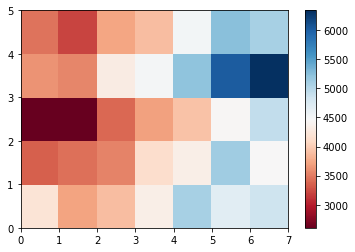

In [28]:
# Heat map to show relationship between cut, color and price
plt.pcolor(grouped_cco_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'cut' and 'color' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'cut' and 'color'.

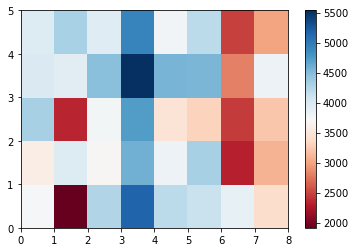

In [29]:
# Heat map to show relationship between cut, clarity and price
plt.pcolor(grouped_ccl_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'cut' and 'clarity' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'cut' and 'clarity'.

The main question we want to answer with our visualization and analysis is: "What are the main characteristics which have the most impact on the diamond price?"
To get a better measure of the important characteristics, we look at the correlation of these variables with the diamond price, in other words: how is the diamond price dependent on this variable?

The default labels on the heat maps convey no useful information to us. We'll change that as below:

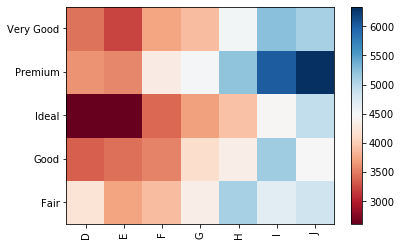

In [30]:
# Modified Heat map to show relationship between cut, color and price with labeled axes
fig, ax = plt.subplots()
im = ax.pcolor(grouped_cco_pivot, cmap='RdBu')

#label names
row_labels = grouped_cco_pivot.columns.levels[1]
col_labels = grouped_cco_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_cco_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_cco_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

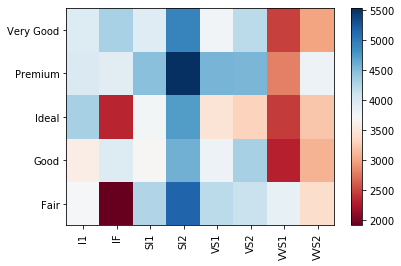

In [31]:
# Modified Heat map to show relationship between cut, clarity and price with labeled axes
fig, ax = plt.subplots()
im = ax.pcolor(grouped_ccl_pivot, cmap='RdBu')

#label names
row_labels = grouped_ccl_pivot.columns.levels[1]
col_labels = grouped_ccl_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_ccl_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_ccl_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.</p>

We will obtain the correlation and p-values using the "stats" module in the "scipy" library

In [32]:
from scipy import stats

Now let's calculate the Peason Coefficient and P-value between Carat and Price

In [33]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(train_df["carat"],train_df["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  0.9217770771967906 and the P_value =  0.0


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between carat and price is statistically significant, the linear relationship is also extremely strong (~0.92)</p>

Now let's calculate the Peason Coefficient and P-value between Cut_ord and Price

In [34]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(train_df["cut_ord"],train_df["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  -0.053803816649315994 and the P_value =  2.2077120511699893e-33


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between cut_ord and price is statistically significant, the linear relationship is negative and extremely weak (~-0.05)</p>

Now let's calculate the Peason Coefficient and P-value between Clarity_ord and Price

In [35]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(train_df["clarity_ord"],train_df["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  -0.1421585164485365 and the P_value =  5.543659468353085e-224


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between clarity_ord and price is statistically significant, the linear relationship is negative and extremely weeak too (~-0.14)</p>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

Let's group the different types of cut, color and clarity and see if they impact price

In [36]:
#ANOVA results for cut and Price
f_val,p_val = stats.f_oneway(train_df[["cut","price"]].groupby(["cut"]).get_group("Fair")["price"],train_df[["cut","price"]].groupby(["cut"]).get_group("Good")["price"],train_df[["cut","price"]].groupby(["cut"]).get_group("Ideal")["price"],train_df[["cut","price"]].groupby(["cut"]).get_group("Premium")["price"],train_df[["cut","price"]].groupby(["cut"]).get_group("Very Good")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 167.08255466758496 , P = 2.2641503368553276e-142


In [37]:
#ANOVA results for color and Price
f_val,p_val = stats.f_oneway(train_df[["color","price"]].groupby(["color"]).get_group("D")["price"],train_df[["color","price"]].groupby(["color"]).get_group("E")["price"],train_df[["color","price"]].groupby(["color"]).get_group("F")["price"],train_df[["color","price"]].groupby(["color"]).get_group("G")["price"],train_df[["color","price"]].groupby(["color"]).get_group("H")["price"],train_df[["color","price"]].groupby(["color"]).get_group("I")["price"],train_df[["color","price"]].groupby(["color"]).get_group("J")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 272.9378782801696 , P = 0.0


In [38]:
#ANOVA results for clarity and Price
f_val,p_val = stats.f_oneway(train_df[["clarity","price"]].groupby(["clarity"]).get_group("I1")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("IF")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("SI1")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("SI2")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("VS1")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("VS2")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("VVS1")["price"],train_df[["clarity","price"]].groupby(["clarity"]).get_group("VVS2")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 195.03490668740457 , P = 1.1299564229677089e-286


# Conclusion

Since the F-scores of the 3 categories with respect to price are quite large and the p-values are close to 0 we can adequately say the categories are statistically significant to use in modelling.

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the diamond price. We have narrowed it down to the following variables:

Continuous numerical variables:
* carat

Categorical variables:
+ cut
+ color
+ clarity


# Model Development
## 1. Simple Linear and Multiple Linear regression

In [39]:
from sklearn.linear_model import LinearRegression

## Create the linear regression object

In [40]:
LRObj = LinearRegression()
LRObj

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We want to look at how weight in carats can help us predict diamond price.
Using simple linear regression, we will create a linear function with "carat" as the predictor variable and the "price" as the response variable.

In [41]:
X = train_df[["carat"]]
Y = train_df["price"]
#print(X.head())
#print(Y.head())

Fit the linear model using carat

In [42]:
LRObj.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's make a prediction

In [43]:
Predicted_Price_carat= LRObj.predict(X)
Predicted_Price_carat[0:6]

array([ 1699.57959549, 15202.0376715 ,  3173.98593712,  1389.1782604 ,
          69.97258631,   302.77358762])

From the prediction we can comfortably say, we can't use weight in carats as the only predictor variable in our model, we expect the price to increase but in our case the price decreases

Let's get the slope and the intercept for the model

In [44]:
print("slope = ",LRObj.coef_,"Intercept = ",LRObj.intercept_)

slope =  [7760.03337702] Intercept =  -2258.0374267940842


Our estimated linear model using carat as our only predictor variable is a shown below:

`price = 7760.0334*carat - 2258.0374`

## 2. Multiple Linear Regression Model

We can use MLR to predict diamond price usinng more than one predictor variable

### a. First create dummy Variables for the corresponding categorical variables

> Most Models work well with numerical values as opposed to categorical values 

> To create dummy variables if you have ``n`` unique subsets in a categorical variable, you need to create ``n-1`` dummy variables

In [45]:
# create dummy variables for multiple categories
# drop_first=True handles n - 1 
train_df = pd.get_dummies(train_df, columns=['cut', 'color','clarity'], drop_first=True)
train_df.head()
# this drops original cut, color and clarity columns
# and creates dummy variables

,carat,cut_ord,clarity_ord,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,4,4,1749.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2.25,1,1,7069.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,3,5,2757.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.47,2,4,1243.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.30,5,7,789.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We then drop the cut_ord and clarity_ord columns since we won't be using them in our model

In [46]:
train_df.drop(columns={"cut_ord","clarity_ord"},inplace = True)
train_df.head()

,carat,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,1749.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,2.25,7069.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.70,2757.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.47,1243.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.30,789.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


We then proceed to create the MLR using the carat and other dummy variables created with price as the target variable

In [47]:
# Create a variable holding the predictor varaibles
pred_vars = train_df[["carat","cut_Good","cut_Ideal","cut_Premium","cut_Very Good","color_E","color_F","color_G","color_H","color_I","color_J","clarity_IF","clarity_SI1","clarity_SI2","clarity_VS1","clarity_VS2","clarity_VVS1","clarity_VVS1"]]

In [48]:
# Create/instantiate an MLR object
MLR_Obj = LinearRegression()
MLR_Obj

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Fit the MLR model
MLR_Obj.fit(pred_vars,train_df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
MLR_Obj.coef_

array([ 8696.60532393,  1148.52390422,  1569.88124911,  1390.17120988,
        1416.98200588,  -205.09419774,  -288.01354143,  -457.47893779,
        -959.08518657, -1410.0220889 , -2273.58814475,  1031.28903954,
        -717.91352745, -1615.59865313,   206.52874319,   -97.60342151,
         337.07577157,   337.07577157])

In [51]:
MLR_Obj.intercept_

-3457.1695908010397

### Check features of the test dataframe

In [52]:
test_df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [53]:
# Format the test df to have same features as train_df bar the price
# First drop the unnamed, cut_ord and clarity_ord features
test_df.rename(columns={'Unnamed: 0':'Mark'}, inplace=True)
test_df.drop(columns = ['Mark',"cut_ord","clarity_ord"], inplace = True) # => train_df = train_df.drop(columns =["Mark"]) == train_df.drop("columns_names",axis = 1, inplace = True)
test_df.head()

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2


In [54]:
# Check the datatypes for test_df
test_df.dtypes

carat      float64
cut         object
color       object
clarity     object
dtype: object

In [55]:
# create dummy variables for multiple categories
# drop_first=True handles n - 1 
test_df = pd.get_dummies(test_df, columns=['cut', 'color','clarity'], drop_first=True)
test_df.head()
# this drops original cut, color and clarity columns
# and creates dummy variables

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1.01,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.71,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1.01,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.27,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [56]:
test_df.dtypes

carat            float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [57]:
# Make the prediction

predicted_prices = MLR_Obj.predict(test_df)
predicted_prices

array([7367.46764903, 5919.84333129, 2626.77668466, ..., 5915.85553997,
       1455.06167071, 5737.45672337])

In [58]:
# Convert the predicted_prices array to a dataseries and add it as a column to the test_df
test_df['predicted price'] = pd.Series(predicted_prices)
test_df.head()

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,predicted price
0,1.22,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,7367.467649
1,1.01,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,5919.843331
2,0.71,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2626.776685
3,1.01,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5280.684382
4,0.27,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-161.214319


# Recommendation

Now that you have the predicted price for each diamond, it’s time to calculate the bid price for the whole set. Note: The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of the that price, so your recommended bid price should represent that.

In [62]:
test_df.columns

Index(['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'predicted price'],
      dtype='object')

In [63]:
recommended_bid = test_df["predicted price"].sum()*0.7
print("I recommended we make a bid worth:", recommended_bid)

I recommended we make a bid worth: 8253783.194293198
